In [30]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

from matplotlib import cm
from matplotlib.patches import Arrow, Circle, Polygon
from mpl_toolkits.mplot3d import axes3d

import numpy as np
import matplotlib.pyplot as plt

In [24]:
def ellipse(x, y, c1=3, c2=2, a=2, b=1, rot=np.pi/6):
    x1 = x * np.cos(rot) + y * np.sin(rot)
    y1 = -x * np.sin(rot) + y * np.cos(rot)
    return (x1 - c1)**2/a**2 + (y1 - c2)**2/b**2  

def ellipse_grad(x, y, c1=3, c2=2, a=2, b=1, rot=np.pi/6):
    x1 = x * np.cos(rot) + y * np.sin(rot)
    y1 = -x * np.sin(rot) + y * np.cos(rot)
    J = np.array([[np.cos(rot), np.sin(rot)], [-np.sin(rot), np.cos(rot)]])
    deriv = np.array([2 * (x1 - c1)/a**2, 2 * (y1 - c2)/b**2])
    return np.dot(deriv, J).T

array([ 0.70096189, -4.21410162])

In [7]:
X, Y = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
Z = ellipse(X.ravel(), Y.ravel()).reshape(X.shape)

<IPython.core.display.Javascript object>


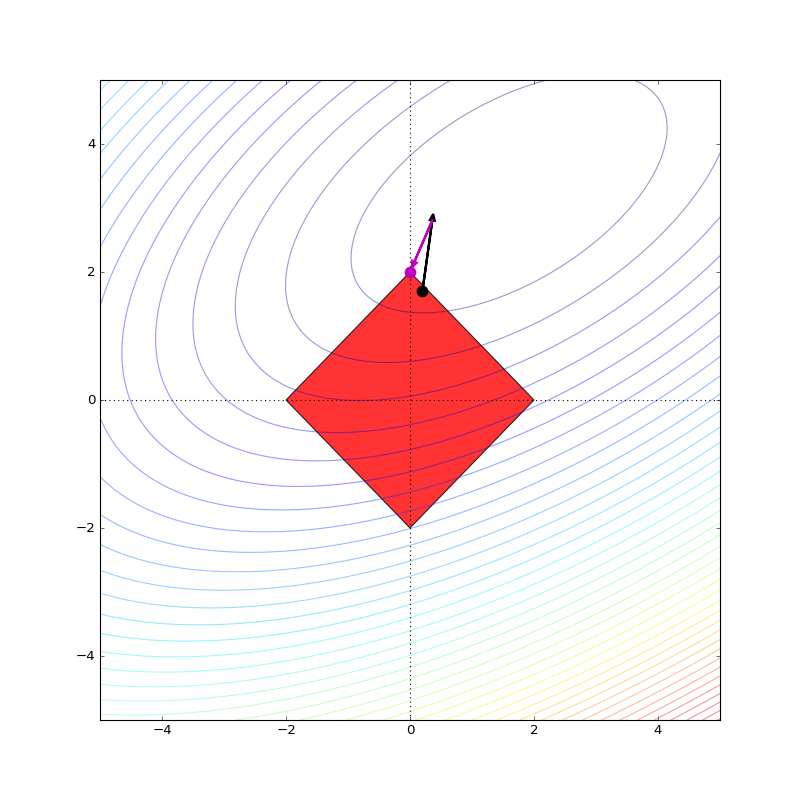

In [73]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

choice=2


# Draw axis
ax.plot([0, 0], [-5, 5], ls=':', c='k')
ax.plot([-5, 5], [0, 0], ls=':', c='k')

x0, y0 = 0, 0
if choice == 1:
    x0, y0 = -0.2, 1.7
elif choice == 2:
    x0, y0 = 0.2, 1.7
    
gx1, gy1 = ellipse_grad(x0, y0)
x1, y1 = x0 - 0.7 * gx1, y0 - 0.7 * gy1
x1_l2, y1_l2 = 2 * x1/np.sqrt(x1**2 + y1**2), 2 * y1/np.sqrt(x1**2 + y1**2)
x1_l1, y1_l1 = 0, 2

ax.contour(X, Y, Z, 40, alpha=0.4)
ax.plot([x0], [y0], marker='o', markersize=10, color='k')
ax.arrow(x0, y0, -0.7 * gx1, -0.7 * gy1, fc='k', ec='k', lw=2, head_length=0.1, head_width=0.08)


if choice == 1:
    ax.add_patch(Circle((0, 0), 2, color='r', alpha=0.8))
    ax.arrow(x1, y1, 0.7 * (x1_l2 - x1), 0.7* (y1_l2 - y1), fc='m', ec='m', lw=2, head_length=0.1, head_width=0.08)
    ax.plot([x1_l2], [y1_l2], c='m', marker='o', markersize=10, markeredgecolor='m')



if choice == 2:
    ax.add_patch(Polygon([(0, 2), (2, 0), (0, -2), (-2, 0)], fill=True, fc='red', alpha=0.8, closed=True))
    ax.arrow(x1, y1, 0.8 * (x1_l1 - x1), 0.8* (y1_l1 - y1), fc='m', ec='m', lw=2, head_length=0.1, head_width=0.08)
    ax.plot([x1_l1], [y1_l1], c='m', marker='o', markersize=10, markeredgecolor='m')


#plt.plot([x0, x0 - x1], [y0, y0 - y1])